In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

#Reading in the data as insurance dataframe
amazon = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/amazon_toy_sample_clean.csv", encoding="ISO-8859-1")

#Verifying that we can see the data
amazon.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews
0,dafc6b4ba4b4a3e7b4ff83402a196ae8,Dinosaur Eggs,Halsall,0.29,3,new,3,2,4.0,Figures & Playsets > Dinosaurs,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,Manufacturer's Description not available,Technical Details Item Weight82 g Product Dime...,Not available,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,None,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...
1,ba85fb9368114fce646379ed12750a5f,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,new,2,1,4.5,Hobbies > Trading Cards & Accessories > Packs ...,Unknown,Manufacturer's Description not available,Technical Details Item Weight454 g Product Dim...,Not available,Not available,None,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...
2,14e24c29ba38c2717754baa2638f242a,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,7,new,2,1,4.5,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Latex-Cannonball | htt...,Colour Name:Assorted Bold | Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold | Size Name:Pack o...,http://www.amazon.co.uk/Water-Bombs-Pack-100-A...,None,Great item // 4.0 // 27 Dec. 2015 // By\n \...
3,048d64d2ba61c23f6280663a7281ff19,iCarly Shopper Bag - Lilac and Pink,Trade Mark Collections,0.50,4,new,7,2,4.6,Sports Toys & Outdoor > Beach Toys > Airbeds &...,http://www.amazon.co.uk/iCarly-Large-Rectangle...,Manufacturer's Description The iCarly Shopping...,NaN,Manufacturer's Description The iCarly Shopping...,http://www.amazon.co.uk/Namco-Bandai-Icarly/dp...,None,Very good product // 5.0 // 26 Mar. 2014 // By...
4,7b72f597db5d74d35c4f91ef69708cf1,4 Packs of Mini Colouring Pencils (4 pencils i...,unisex party bag fillers,0.60,7,new,21,1,4.3,Arts & Crafts > Colouring Pencils,http://www.amazon.co.uk/12-Mini-Christmas-Colo...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,Technical Details Item Weight59 g Product Dime...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,http://www.amazon.co.uk/20-Packs-Wax-Crayons-P...,How many packs in the box. // I got four Mimi ...,Well made and presented // 4.0 // 6 April 2015...


In [ ]:
amazon2 = amazon[['price','number_available_in_stock','number_of_reviews','number_of_answered_questions','average_review_rating_of_5']]

In [ ]:
amazon2.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5
0,0.29,3,3,2,4.0
1,0.38,2,2,1,4.5
2,0.39,7,2,1,4.5
3,0.50,4,7,2,4.6
4,0.60,7,21,1,4.3


In [ ]:
buckets = [ 0, 4.5, 4.9, 5]
bucketlabels = ['Low', 'Medium', 'High']

# Using cut() to separate data into the buckets we have built
amazon2['buckets'] = pd.cut(amazon2['average_review_rating_of_5'] , bins=buckets, labels=bucketlabels, include_lowest=True)

# Check if we have the new attribute 'buckets' at the end of our dataset
amazon2.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,buckets
0,0.29,3,3,2,4.0,Low
1,0.38,2,2,1,4.5,Low
2,0.39,7,2,1,4.5,Low
3,0.50,4,7,2,4.6,Medium
4,0.60,7,21,1,4.3,Low


In [ ]:
pip install pandas-profiling # installing the current GA version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


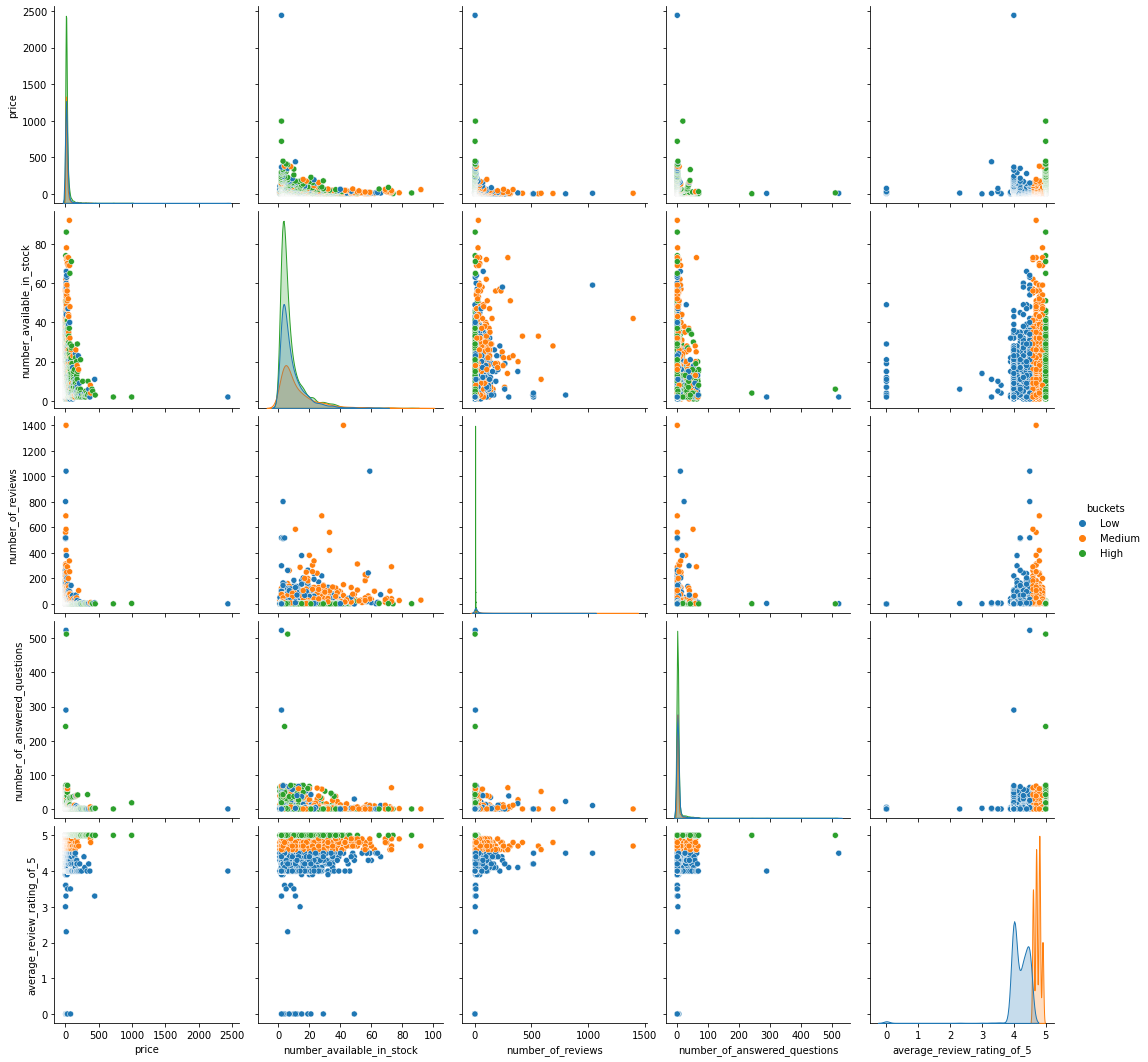

In [ ]:
# Visualizing the data with a pairplot because why not?
# Let's investigate what kinds of relationships exist between the variables.

sns.pairplot(amazon2,hue="buckets", height=3, diag_kind="kde")

In [ ]:
# This is the solution for task 2 above. 
amazon3 = pd.DataFrame(amazon2, columns = ['price','number_available_in_stock','number_of_reviews','number_of_answered_questions','buckets'])
amazon3.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,buckets
0,0.29,3,3,2,Low
1,0.38,2,2,1,Low
2,0.39,7,2,1,Low
3,0.50,4,7,2,Medium
4,0.60,7,21,1,Low


In [ ]:
# Replace southwest with 0, southeast with 1, northwest with 2, and northeast with 3 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
amazon3["buckets"] = labelencoder.fit_transform(amazon3["buckets"])
buckets = pd.DataFrame({'buckets': ['Low', 'Medium', 'High']})
amazon3.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,buckets
0,0.29,3,3,2,1
1,0.38,2,2,1,1
2,0.39,7,2,1,1
3,0.50,4,7,2,2
4,0.60,7,21,1,1


In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
amazon3 = create_dummies(amazon3,"buckets")

amazon3.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,buckets,buckets_0,buckets_1,buckets_2
0,0.29,3,3,2,1,0,1,0
1,0.38,2,2,1,1,0,1,0
2,0.39,7,2,1,1,0,1,0
3,0.50,4,7,2,2,0,0,1
4,0.60,7,21,1,1,0,1,0


In [ ]:
# Features before mean normalization
unscaled_features = amazon3[['price','number_available_in_stock','number_of_reviews','number_of_answered_questions']]

# Mean Normalization to have a faster classifier 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Calculate μ & σ(fit) and apply the transformation(transform)
unscaled_features_array = sc.fit_transform(unscaled_features.values)

# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
scaled_features = pd.DataFrame(unscaled_features_array, index=unscaled_features.index, columns=unscaled_features.columns)

scaled_features.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions
0,-0.430461,-0.629063,-0.209215,-0.143680
1,-0.428516,-0.738745,-0.234667,-0.218214
2,-0.428300,-0.190334,-0.234667,-0.218214
3,-0.425924,-0.519381,-0.107408,-0.143680
4,-0.423763,-0.190334,0.248920,-0.218214


In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = amazon3['buckets']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (4245, 4)
y_train shape: (4245,)


In [ ]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (2091, 4)
y_test shape: (2091,)


In [ ]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
# running this with all the default settings, including a hidden_layer_sizes setting of 100 adn 200 maximum iterations. 
# Verbose is on so we can see how this runs.

mlp1 = MLPClassifier(verbose=1) # We are running this in verbose mode so we can see the output of each iteration.

In [ ]:
# As this runs in verbose mode, note how the loss function steps down with every single iteration!

mlp1.fit(X_train, y_train)

Iteration 1, loss = 1.11373170
Iteration 2, loss = 1.02641163
Iteration 3, loss = 0.98453602
Iteration 4, loss = 0.96223920
Iteration 5, loss = 0.94631012
Iteration 6, loss = 0.93183448
Iteration 7, loss = 0.91826238
Iteration 8, loss = 0.90497843
Iteration 9, loss = 0.89305812
Iteration 10, loss = 0.88086152
Iteration 11, loss = 0.86917503
Iteration 12, loss = 0.85885786
Iteration 13, loss = 0.84893402
Iteration 14, loss = 0.84047182
Iteration 15, loss = 0.83357092
Iteration 16, loss = 0.82589594
Iteration 17, loss = 0.81953194
Iteration 18, loss = 0.81423779
Iteration 19, loss = 0.80925322
Iteration 20, loss = 0.80410254
Iteration 21, loss = 0.79948358
Iteration 22, loss = 0.79555387
Iteration 23, loss = 0.79201015
Iteration 24, loss = 0.78774202
Iteration 25, loss = 0.78510597
Iteration 26, loss = 0.78225672
Iteration 27, loss = 0.77994699
Iteration 28, loss = 0.77734731
Iteration 29, loss = 0.77505997
Iteration 30, loss = 0.77297007
Iteration 31, loss = 0.77061538
Iteration 32, los

MLPClassifier(verbose=1)

In [ ]:
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test

print(mlp1.score(X_test,y_test))
		


0.6164514586322334


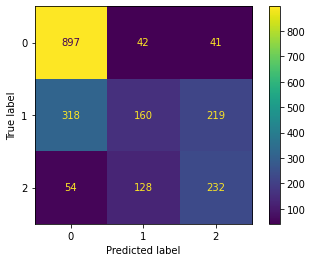

In [ ]:
# Set up Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp1, X_test, y_test)

In [ ]:
# Now, let's see what the predictions look like
y_pred = mlp1.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [0 2 0 ... 0 0 1]


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       980
           1       0.48      0.23      0.31       697
           2       0.47      0.56      0.51       414

    accuracy                           0.62      2091
   macro avg       0.55      0.57      0.54      2091
weighted avg       0.59      0.62      0.58      2091



In [ ]:
mlp2 = MLPClassifier(hidden_layer_sizes=10,solver='sgd',learning_rate_init= 0.01, max_iter=500, verbose = 1)

In [ ]:
mlp2.fit(X_train, y_train)

Iteration 1, loss = 1.13081253
Iteration 2, loss = 1.04189395
Iteration 3, loss = 1.00887192
Iteration 4, loss = 0.98542402
Iteration 5, loss = 0.96543635
Iteration 6, loss = 0.94773190
Iteration 7, loss = 0.93280418
Iteration 8, loss = 0.91886599
Iteration 9, loss = 0.90601500
Iteration 10, loss = 0.89460452
Iteration 11, loss = 0.88468022
Iteration 12, loss = 0.87519236
Iteration 13, loss = 0.86670272
Iteration 14, loss = 0.85932916
Iteration 15, loss = 0.85218278
Iteration 16, loss = 0.84465487
Iteration 17, loss = 0.83844375
Iteration 18, loss = 0.83229427
Iteration 19, loss = 0.82725128
Iteration 20, loss = 0.82279128
Iteration 21, loss = 0.81829595
Iteration 22, loss = 0.81443769
Iteration 23, loss = 0.81113723
Iteration 24, loss = 0.80797556
Iteration 25, loss = 0.80444456
Iteration 26, loss = 0.80211494
Iteration 27, loss = 0.79923883
Iteration 28, loss = 0.79705714
Iteration 29, loss = 0.79470469
Iteration 30, loss = 0.79246662
Iteration 31, loss = 0.79006431
Iteration 32, los

MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.01, max_iter=500,
              solver='sgd', verbose=1)

In [ ]:
print (mlp2.score(X_test,y_test))

0.6111908177905309


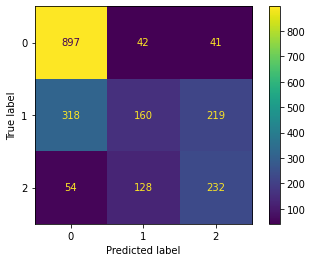

In [ ]:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp1, X_test, y_test)

In [ ]:
mlp3 = MLPClassifier(hidden_layer_sizes=10,solver='sgd',learning_rate_init= 0.01, max_iter=500, verbose = 1)